# Optimal Number of Hidden Layers for Vanilla RNN

In [19]:
#Importing the required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from keras import optimizers
import matplotlib.pyplot as plt

In [20]:
#Reading the Dataset
dft1 = pd.read_csv('TripA04.csv')
dft2 = pd.read_csv('TripA06.csv')
dft3 = pd.read_csv('TripA08.csv')
dft4 = pd.read_csv('TripA12.csv')
dft5 = pd.read_csv('TripA16.csv')
dft6 = pd.read_csv('TripA20.csv')
dft7 = pd.read_csv('TripA24.csv')
dft8 = pd.read_csv('TripA28.csv')
dft9 = pd.read_csv('TripA32.csv')

dft10 = pd.read_csv('TripB01.csv')
dft11 = pd.read_csv('TripB03.csv')
dft12 = pd.read_csv('TripB10.csv')
dft13 = pd.read_csv('TripB15.csv')
dft14 = pd.read_csv('TripB20.csv')
dft15 = pd.read_csv('TripB23.csv')
dft16 = pd.read_csv('TripB25.csv')
dft17 = pd.read_csv('TripB27.csv')
dft18 = pd.read_csv('TripB30.csv')
dft19 = pd.read_csv('TripB33.csv')
dft20 = pd.read_csv('TripB38.csv')


dft21 = pd.read_csv('TripA02.csv')
dft22 = pd.read_csv('TripA03.csv')
dft23 = pd.read_csv('TripA07.csv')
dft24 = pd.read_csv('TripA15.csv')
dft25 = pd.read_csv('TripA21.csv')
dft26 = pd.read_csv('TripA25.csv')
dft27 = pd.read_csv('TripA27.csv')

dft28 = pd.read_csv('TripB05.csv')
dft29 = pd.read_csv('TripB07.csv')
dft30 = pd.read_csv('TripB13.csv')
dft31 = pd.read_csv('TripB16.csv')
dft32 = pd.read_csv('TripB22.csv')
dft33 = pd.read_csv('TripB28.csv')
dft34 = pd.read_csv('TripB31.csv')
dft35 = pd.read_csv('TripB37.csv')
df = pd.concat([dft1, dft2, dft3, dft4, dft5, dft6, dft7, dft8, dft9, dft10, dft11, dft12, dft13, dft14, dft15, dft16, dft17, dft18, dft19, 
                dft20, dft21, dft22, dft23, dft24, dft25, dft26, dft27, dft28, dft29, dft30, dft31, dft32, dft33, dft34, dft35], ignore_index=True)
df.shape

(538214, 102)

In [21]:
df.describe()

,Time [s],Velocity [km/h],Elevation [m],Throttle [%],Motor Torque [Nm],Longitudinal Acceleration [m/s^2],Regenerative Braking Signal,Battery Voltage [V],Battery Current [A],Battery Temperature [C],...,Temperature Footweel Co-Driver [°C],Temperature Feetvent Co-Driver [°C],Temperature Feetvent Driver [°C],Temperature Head Co-Driver [°C],Temperature Head Driver [°C],Temperature Vent right [°C],Temperature Vent central right [°C],Temperature Vent central left [°C],Temperature Vent right [°C],Battery Temperature [�C]
count,538214.000000,538214.000000,538214.000000,538214.000000,538214.000000,538214.000000,538214.000000,538214.000000,538214.000000,496092.000000,...,18223.000000,18223.000000,18223.000000,18223.000000,18223.000000,18223.000000,18223.000000,18223.000000,18223.000000,23899.000000
mean,927.042681,48.204922,524.400663,30.368202,11.335276,0.003850,0.058006,376.137015,-21.815535,16.707009,...,23.509571,44.573138,44.204625,17.991491,19.900232,33.153629,32.101083,35.385577,31.368940,3.714842
std,671.750161,36.031693,41.051019,17.871018,36.659281,0.664698,0.233630,10.793452,43.691556,7.965289,...,4.190296,7.899812,8.072591,3.958080,3.915668,6.962805,7.177824,8.173045,6.866679,1.633322
min,0.000000,0.000000,449.000000,0.000000,-87.500000,-9.030000,0.000000,301.800000,-402.280000,-1.000000,...,0.490000,-0.740000,-0.650000,3.980000,4.680000,0.310000,0.400000,0.660000,0.920000,1.000000
25%,385.300000,19.989925,484.000000,17.280000,0.000000,-0.240000,0.000000,369.820000,-33.640000,10.000000,...,23.010000,43.310000,42.640000,18.595000,20.390000,33.020000,32.870000,35.090000,31.300000,2.000000
50%,814.800000,44.570000,520.000000,35.130000,7.000000,-0.010000,0.000000,378.930000,-12.670000,18.000000,...,24.020000,44.390000,43.780000,19.500000,21.170000,33.870000,33.880000,36.270000,32.080000,4.000000
75%,1335.300000,71.580000,556.520000,43.780000,23.500000,0.220000,0.000000,384.066905,-2.600000,25.000000,...,25.120000,45.820000,45.405000,19.860000,21.700000,35.220000,35.050000,38.280000,33.730000,5.000000
max,3251.700000,152.000000,664.990000,99.630000,249.500000,4.460000,1.000000,394.660000,143.840000,32.000000,...,29.110000,55.210000,55.910000,21.350000,23.870000,42.900000,39.760000,46.480000,41.070000,6.000000


In [22]:
#Extracting input variables and target variable from the dataset
attr = ['Battery Voltage [V]','Battery Current [A]','Battery Temperature [C]','SoC [%]']
df = df[:].loc[:,attr]

## Data Preprocessing

In [23]:
df.isna().sum()

Battery Voltage [V]            0
Battery Current [A]            0
Battery Temperature [C]    42122
SoC [%]                     5811
dtype: int64

In [24]:
df = df.fillna(method = 'bfill')

C:\Users\moule\AppData\Local\Temp\ipykernel_6148\2090509475.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method = 'bfill')


In [25]:
null_rows = df[df.isnull().any(axis=1)]
null_rows

,Battery Voltage [V],Battery Current [A],Battery Temperature [C],SoC [%]


In [26]:
df = df.sort_values(by='SoC [%]', ascending=False)
df

,Battery Voltage [V],Battery Current [A],Battery Temperature [C],SoC [%]
35770,391.57,-8.96,26.0,86.6
35782,390.97,-16.99,26.0,86.6
35792,390.83,-17.85,26.0,86.6
35791,390.82,-17.96,26.0,86.6
35790,390.87,-17.66,26.0,86.6
...,...,...,...,...
510698,339.38,-1.30,11.0,19.6
510696,338.25,-10.61,11.0,19.6
510695,338.10,-11.60,11.0,19.6
510694,338.10,-11.15,11.0,19.6


In [27]:
df.shape

(538214, 4)

In [28]:
df.describe()

,Battery Voltage [V],Battery Current [A],Battery Temperature [C],SoC [%]
count,538214.000000,538214.000000,538214.000000,538214.000000
mean,376.137015,-21.815535,16.226506,65.843678
std,10.793452,43.691556,7.824246,12.931754
min,301.800000,-402.280000,-1.000000,19.600000
25%,369.820000,-33.640000,10.000000,59.400000
50%,378.930000,-12.670000,17.000000,68.100000
75%,384.066905,-2.600000,22.000000,75.300000
max,394.660000,143.840000,32.000000,86.600000


# Splitting the Dataset into Training and Validation Subsets

In [29]:
def train_test_split(df, validation_split=0.2):
  train = df.loc[:,:].values

  validation_size = int(len(train) * validation_split)

  training_set = train[:-validation_size]
  validation_set = train[-validation_size:]

  return training_set, validation_set

training_set, validation_set = train_test_split(df)
print(training_set.shape, validation_set.shape)

(430572, 4) (107642, 4)


In [30]:
print(type(training_set))
print(type(validation_set))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [31]:
#Normalizing the dataset
sc = MinMaxScaler(feature_range=(-1, 1))
training_set_scaled = sc.fit_transform(training_set)
print(training_set_scaled.shape)
validation_set_scaled = sc.fit_transform(validation_set)
print(validation_set_scaled.shape)

(430572, 4)
(107642, 4)


## Converting the Training and Validation Subsets into Sequential Timesteps

In [32]:
def split_sequence(sequence, n_steps):
  X, y = list(), list()
  for i in range(len(sequence)):
    end_ix = i + n_steps
    if end_ix > len(sequence) - 1:
      break
    
    seq_x = sequence[i:end_ix,:] 
    seq_y = sequence[end_ix,-1]
    X.append(seq_x)
    y.append(seq_y)
  return np.array(X), np.array(y)
n_steps = 1
features = training_set_scaled.shape[1]

X_train, y_train = split_sequence(training_set_scaled, n_steps)
print(X_train.shape,y_train.shape)
X_val, y_val = split_sequence(validation_set_scaled, n_steps)
print(X_val.shape,y_val.shape)

(430571, 1, 4) (430571,)
(107641, 1, 4) (107641,)


## RNN Model

### Defining the Model

In [18]:
def create_model(nl):
   model = Sequential()
   if nl == 1:
      model.add(SimpleRNN(units=256, activation="tanh", input_shape=(n_steps, features)))
      model.add(Dense(units=1,activation='linear'))
   elif nl == 2:
      model.add(SimpleRNN(units=256, activation="tanh", input_shape=(n_steps, features), return_sequences=True))
      model.add(SimpleRNN(units=128, activation="tanh"))
      model.add(Dense(units=1,activation='linear'))
   elif nl == 3:
      model.add(SimpleRNN(units=256, activation="tanh", input_shape=(n_steps, features), return_sequences=True))
      model.add(SimpleRNN(units=128, activation="tanh", return_sequences=True))
      model.add(SimpleRNN(units=64, activation="tanh"))
      model.add(Dense(units=1,activation='linear'))
   elif nl == 4:
      model.add(SimpleRNN(units=256, activation="tanh", input_shape=(n_steps, features), return_sequences=True))
      model.add(SimpleRNN(units=128, activation="tanh", return_sequences=True))
      model.add(SimpleRNN(units=64, activation="tanh", return_sequences=True))
      model.add(SimpleRNN(units=32, activation="tanh"))
      model.add(Dense(units=1,activation='linear'))

   opt = optimizers.SGD(learning_rate=0.025)
   model.compile(optimizer=opt, loss="mean_squared_error")
   return model

### Training the Model

Model 1:
Epoch 1/100


d:\Python\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


841/841 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0168 - val_loss: 4.0009e-04
Epoch 2/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 7.2613e-05 - val_loss: 8.7334e-05
Epoch 3/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.7958e-05 - val_loss: 2.1134e-05
Epoch 4/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 5.7921e-06 - val_loss: 7.5032e-06
Epoch 5/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.0933e-06 - val_loss: 4.3102e-06
Epoch 6/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.4841e-06 - val_loss: 3.7426e-06
Epoch 7/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.3198e-06 - val_loss: 3.6923e-06
Epoch 8/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.3065e-06 - val_loss: 3.6799e-06
Epoch 9/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.2711e-06 - val_loss: 3.6759e-06
Epoch 10/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.2660e-06 - val_loss: 3.6773e-06
Epoch 11/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.2

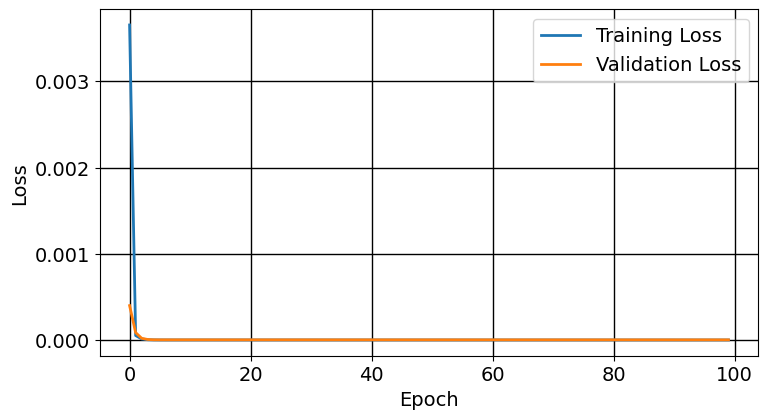

Train MSE: 1.8472334204489016e-06
Validation MSE: 3.360311211508815e-06
13456/13456 ━━━━━━━━━━━━━━━━━━━━ 6s 428us/step
3364/3364 ━━━━━━━━━━━━━━━━━━━━ 1s 408us/step
Train R2: 0.9999925343581886
Validation R2: 0.999985691406214
Model 2:
Epoch 1/100


d:\Python\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


841/841 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0130 - val_loss: 1.1422e-04
Epoch 2/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 4.1109e-05 - val_loss: 4.6252e-05
Epoch 3/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 2.7772e-05 - val_loss: 4.1069e-05
Epoch 4/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 2.5968e-05 - val_loss: 3.9630e-05
Epoch 5/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 2.4769e-05 - val_loss: 3.8540e-05
Epoch 6/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 2.3706e-05 - val_loss: 3.7558e-05
Epoch 7/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 2.2805e-05 - val_loss: 3.5999e-05
Epoch 8/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 2.2007e-05 - val_loss: 3.5050e-05
Epoch 9/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 2.1342e-05 - val_loss: 3.4085e-05
Epoch 10/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 2.0630e-05 - val_loss: 3.3356e-05
Epoch 11/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 1.9

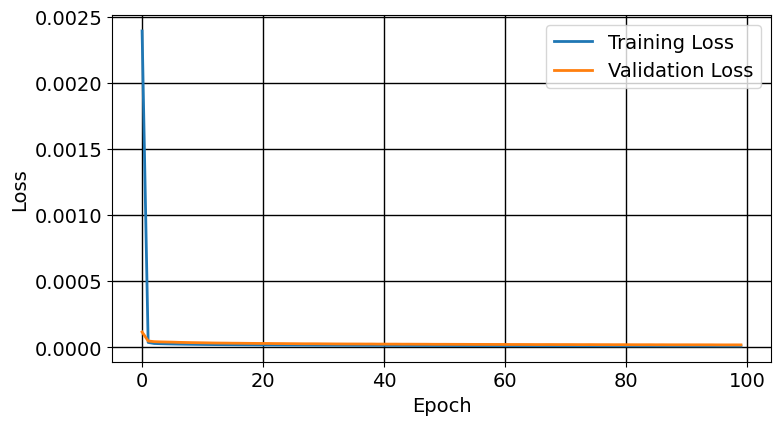

Train MSE: 8.475801223539747e-06
Validation MSE: 1.6790994777693413e-05
13456/13456 ━━━━━━━━━━━━━━━━━━━━ 7s 496us/step
3364/3364 ━━━━━━━━━━━━━━━━━━━━ 2s 476us/step
Train R2: 0.9999657448592957
Validation R2: 0.9999285018904115
Model 3:
Epoch 1/100


d:\Python\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


841/841 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0031 - val_loss: 7.8231e-05
Epoch 2/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 5.3976e-05 - val_loss: 7.3394e-05
Epoch 3/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 4.9817e-05 - val_loss: 6.7219e-05
Epoch 4/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 4.6311e-05 - val_loss: 6.3035e-05
Epoch 5/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 4.3685e-05 - val_loss: 6.2980e-05
Epoch 6/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 4.1697e-05 - val_loss: 5.6889e-05
Epoch 7/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 3.9730e-05 - val_loss: 5.6064e-05
Epoch 8/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 3.7949e-05 - val_loss: 5.1536e-05
Epoch 9/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 3.6327e-05 - val_loss: 4.9761e-05
Epoch 10/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 3.5159e-05 - val_loss: 4.9602e-05
Epoch 11/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 3.4

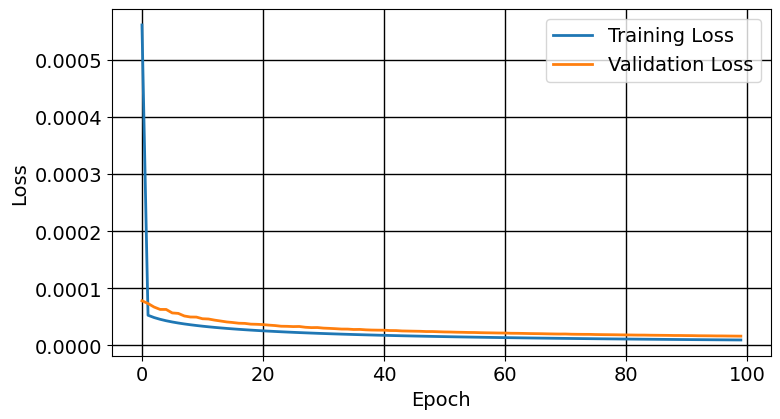

Train MSE: 9.477301318838727e-06
Validation MSE: 1.6207288354053162e-05
13456/13456 ━━━━━━━━━━━━━━━━━━━━ 8s 552us/step
3364/3364 ━━━━━━━━━━━━━━━━━━━━ 2s 537us/step
Train R2: 0.9999616973108355
Validation R2: 0.9999309873122952
Model 4:
Epoch 1/100


d:\Python\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


841/841 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0048 - val_loss: 2.1111e-04
Epoch 2/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 1.1881e-04 - val_loss: 1.8106e-04
Epoch 3/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 9.9247e-05 - val_loss: 1.6992e-04
Epoch 4/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 8.8539e-05 - val_loss: 1.5769e-04
Epoch 5/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 8.0662e-05 - val_loss: 1.4946e-04
Epoch 6/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 7.4531e-05 - val_loss: 1.3779e-04
Epoch 7/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 6.9956e-05 - val_loss: 1.3406e-04
Epoch 8/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 6.6019e-05 - val_loss: 1.2747e-04
Epoch 9/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 6.2258e-05 - val_loss: 1.1942e-04
Epoch 10/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 5.9089e-05 - val_loss: 1.1780e-04
Epoch 11/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 5.6

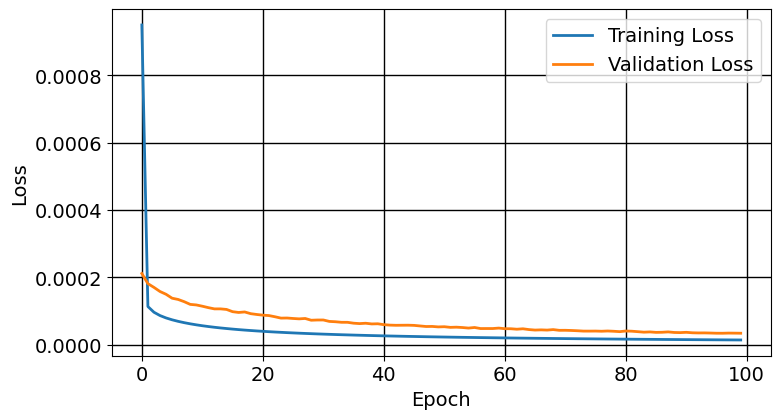

Train MSE: 1.3656991541211028e-05
Validation MSE: 3.3724056265782565e-05
13456/13456 ━━━━━━━━━━━━━━━━━━━━ 8s 550us/step
3364/3364 ━━━━━━━━━━━━━━━━━━━━ 2s 534us/step
Train R2: 0.999944804946524
Validation R2: 0.9998563988699172


In [19]:
tr_mse, vl_mse, tr_r2, vl_r2 = [], [], [], []
for n_layers in [1,2,3,4]:
    print(f"Model {n_layers}:")
    model = create_model(n_layers)
    history = model.fit(X_train, y_train, 
                    epochs=100, 
                    batch_size=512, 
                    validation_data=(X_val, y_val),
                    verbose=1)
    
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    plt.figure(figsize=(8.5,4.5))
    plt.grid(True,linewidth=1,color='black',alpha=1)
    plt.plot(range(len(train_loss)), train_loss, label='Training Loss', linewidth=2)
    plt.plot(range(len(val_loss)), val_loss, label='Validation Loss', linewidth=2)
    plt.xlabel('Epoch',color='black',fontsize=14)
    plt.ylabel('Loss',color='black',fontsize=14)
    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.legend(fontsize=14)
    plt.show()
    
    train_mse = model.evaluate(X_train, y_train, verbose=0)
    print("Train MSE:",train_mse)
    val_mse = model.evaluate(X_val, y_val, verbose=0)
    print("Validation MSE:",val_mse)
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_val)
    train_r2 = r2_score(y_train[:], train_preds)
    val_r2 = r2_score(y_val[:], test_preds)
    print("Train R2:",train_r2)
    print("Validation R2:",val_r2)
    tr_mse.append(train_mse)
    vl_mse.append(val_mse)
    tr_r2.append(train_r2)
    vl_r2.append(val_r2)

### Performance Metrics

In [21]:
from tabulate import tabulate

tr_mse = [float(el) for el in tr_mse]
vl_mse = [float(el) for el in vl_mse]
tr_r2 = [float(el) for el in tr_r2]
vl_r2 = [float(el) for el in vl_r2]

res = []
layer_info = [1,2,3,4]
for i in range(len(layer_info)):
  el = []
  el.append(layer_info[i])
  el.append(round(tr_mse[i]*100,4))
  el.append(round(vl_mse[i]*100,4))
  el.append(round(tr_r2[i]*100,4))
  el.append(round(vl_r2[i]*100,4))
  res.append(el)
cols = ["Number of Hidden Layers","Train MSE","Validation MSE","Train R2","Validation R2"]

print(tabulate(res, headers=cols, tablefmt="grid", colalign=("center", "center", "center", "center", "center")))

+---------------------------+-------------+------------------+------------+-----------------+
|  Number of Hidden Layers  |  Train MSE  |  Validation MSE  |  Train R2  |  Validation R2  |
+===========================+=============+==================+============+=================+
|             1             |   0.0002    |      0.0003      |  99.9993   |     99.9986     |
+---------------------------+-------------+------------------+------------+-----------------+
|             2             |   0.0008    |      0.0017      |  99.9966   |     99.9929     |
+---------------------------+-------------+------------------+------------+-----------------+
|             3             |   0.0009    |      0.0016      |  99.9962   |     99.9931     |
+---------------------------+-------------+------------------+------------+-----------------+
|             4             |   0.0014    |      0.0034      |  99.9945   |     99.9856     |
+---------------------------+-------------+-----------------

After the analysing the performance metrics, the optimal number of hidden layers was found to be **1** as it had the least MSE and highest R2 score.

***